In [ ]:
! pip install kaggle


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

! cp /content/drive/MyDrive/kaggle.json ~/
! mkdir ~/.kaggle
! mv ~/kaggle.json ~/.kaggle/kaggle.json
! chmod 600 ~/.kaggle/kaggle.json

Mounted at /content/drive


In [ ]:
! kaggle datasets download -d eldarsultanow/ml-bsd-dataset-integers

 96% 262M/274M [00:03<00:00, 89.6MB/s]
100% 274M/274M [00:03<00:00, 88.2MB/s]


In [ ]:
! unzip ml-bsd-dataset-integers.zip

Archive:  ml-bsd-dataset-integers.zip
  inflating: rank-vs-ap-integers.csv  


In [ ]:
import pandas as pd
import numpy as np
import sympy
from scipy.interpolate import interp1d
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.ensemble import GradientBoostingRegressor
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping
from sympy import prime, isprime, primerange
import random
import math
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, f1_score


In [ ]:
df = pd.read_csv("rank-vs-ap-integers.csv", index_col=False, header=None)


In [ ]:
new_columns = ['rank', 'con', 'root'] + [f'ap_{i}' for i in range(1, 1230)]

df.columns = new_columns

In [ ]:
print(df)

        rank         con  root  ap_1  ap_2  ap_3  ap_4  ap_5  ap_6  ap_7  ...  \
0          1  7073163673    -1     1     1     2    -1     3    -2     0  ...   
1          1  7578874153    -1     1     0     0    -2     6    -4     0  ...   
2          1  7526030717    -1     0     2     0    -1     0     2     3  ...   
3          1  7078096709    -1     1     0    -3     2    -4    -6    -1  ...   
4          0  7886103067     1    -1     0     0     5    -1     2    -4  ...   
...      ...         ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
149995     3  7098668153    -1    -1     0     0     2     3     6    -2  ...   
149996     3  7682788637    -1     1     0    -2     0    -6     5    -8  ...   
149997     3  7177961411    -1     0    -1    -3    -1     2    -2     2  ...   
149998     3  7547398123    -1     0    -2    -2     0    -6     4    -3  ...   
149999     3  7024626403    -1     0    -2    -4     2    -6    -4     0  ...   

        ap_1220  ap_1221  a

In [ ]:
df_2 = df.loc[df['rank'] == 2].sample(n=13616, random_state=1)
df_3 = df.loc[df['rank'] == 3]
df_3_2 = pd.concat([df_3, df_2])
df_1 = df.loc[df['rank'] == 1].sample(n=42290, random_state=1)
df_0 = df.loc[df['rank'] == 0]
df_0_1 = pd.concat([df_1, df_0])

df_sub = pd.concat([df_0_1, df_3_2])
df_sub['rank'].value_counts()

1    42290
0    42290
3    13616
2    13616
Name: rank, dtype: int64

In [ ]:
df_sub = df_sub[~df_sub['rank'].isin([4,5,6])]

In [ ]:
for i in range(1, 1229):
    ap_col = f"ap_{i+1}"
    df_sub[ap_col].dropna(inplace=True)
    if (df_sub[ap_col] == 0).any():
        df_sub[ap_col].replace(0, df_sub[ap_col].mean(), inplace=True)

In [ ]:
print(df_sub)

        rank         con  root  ap_1      ap_2      ap_3      ap_4      ap_5  \
76492      1  7900158977    -1    -1  1.000000 -0.050683  4.000000 -4.000000   
62660      1  7160450273    -1    -1 -0.035104 -0.050683  2.000000  6.000000   
26131      1  7368135787    -1     0 -0.035104  4.000000  1.000000 -0.057767   
74087      1  7601926747    -1    -1 -2.000000  2.000000  2.000000  4.000000   
8084       1  7716687347    -1     2  1.000000  2.000000 -1.000000  4.000000   
...      ...         ...   ...   ...       ...       ...       ...       ...   
117731     2  7959469501     1    -1  2.000000  1.000000  4.000000 -2.000000   
133602     2  7068244081     1    -1  1.000000 -1.000000 -4.000000  4.000000   
126113     2  7289095621     1    -1 -1.000000 -1.000000 -4.000000 -4.000000   
113982     2  7299096653     1    -1  2.000000 -0.050683  1.000000 -4.000000   
120408     2  7745847787     1    -2 -0.035104  2.000000 -0.058509  3.000000   

        ap_6      ap_7  ...  ap_1220  a

In [ ]:
feature_col = [col for col in df.columns if col.startswith('ap_')]
X = df_sub[ feature_col]
y = df_sub['rank']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)


In [ ]:
gbm = GradientBoostingRegressor(n_estimators=100, max_depth=3, learning_rate=0.1)
gbm.fit(X, y)


In [ ]:
importances = gbm.feature_importances_


In [ ]:
top_50_indices = importances.argsort()[::-1][:50]


In [ ]:
top_50_feature_columns = [feature_col[i] for i in top_50_indices]

In [ ]:
top_features = ['ap_4', 'ap_3', 'ap_5', 'ap_6', 'ap_7', 'ap_8', 'ap_9', 'ap_10', 'ap_11', 'ap_12', 'ap_13', 'ap_14', 'ap_16', 'ap_15', 'ap_17', 'ap_18', 'ap_20', 'ap_19', 'ap_21', 'ap_23', 'ap_22', 'ap_24', 'ap_26', 'ap_29', 'ap_27', 'ap_28', 'ap_30', 'ap_25', 'ap_31', 'ap_32', 'ap_33', 'ap_36', 'ap_37', 'ap_43', 'ap_34', 'ap_35', 'ap_38', 'ap_40', 'ap_39', 'ap_44', 'ap_47', 'ap_42', 'ap_49', 'ap_46', 'ap_45', 'ap_48', 'ap_52', 'ap_53', 'ap_61', 'ap_62']


In [ ]:
print(X)

            ap_4      ap_3      ap_5      ap_6      ap_7      ap_8       ap_9  \
76492   4.392953 -0.054294 -4.508823  5.791946 -2.384182  2.457348 -10.148637   
62660   2.196477 -0.054294  6.763234  2.316778 -1.192091  4.914696   3.805739   
26131   1.098238  4.284933 -0.065115  3.475168  2.384182 -0.096206   8.880058   
74087   2.196477  2.142467  4.508823  3.475168 -0.080452  6.143369  10.148637   
8084   -1.098238  2.142467  4.508823 -6.950335  5.960454  4.914696 -10.148637   
...          ...       ...       ...       ...       ...       ...        ...   
117731  4.392953  1.071233 -2.254411  5.791946 -0.080452 -3.686022   2.537159   
133602 -4.392953 -1.071233  4.508823  4.633557  4.768363 -3.686022  -3.805739   
126113 -4.392953 -1.071233 -4.508823 -2.316778 -2.384182  2.457348  10.148637   
113982  1.098238 -0.054294 -4.508823  5.791946 -7.152545  4.914696   1.268580   
120408 -0.064257  2.142467  3.381617  2.316778  5.960454 -9.829391  -1.268580   

            ap_10      ap_1

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)
X_train_val, X_test_val, y_train_val, y_test_val = train_test_split(X_train, y_train, test_size=0.5, random_state=42)

In [ ]:
import lightgbm as lgb

clf = lgb.LGBMClassifier(n_estimators=100,max_depth=50,learning_rate= 0.1)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test_val)

print("RMSE: {:.4f}".format(np.sqrt(mean_squared_error(y_test_val, y_pred))))
print("R^2 Score: {:.4f}".format(r2_score(y_test_val, y_pred)))
print("ACC Score: {:.4f}".format(accuracy_score(y_test_val, y_pred)))

RMSE: 0.5989
R^2 Score: 0.6358
ACC Score: 0.9103


In [ ]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

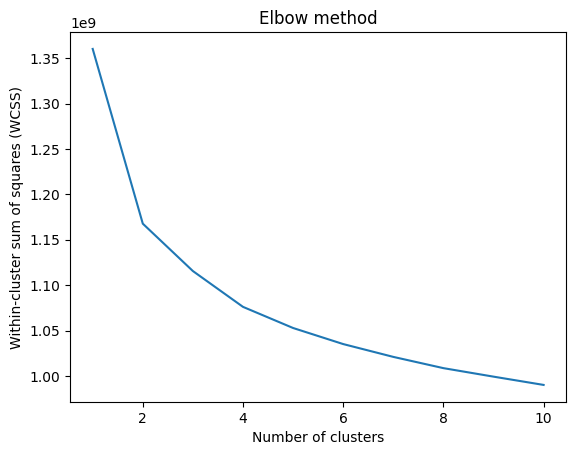

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of squares (WCSS)')
plt.title('Elbow method')
plt.show()

In [ ]:
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X)
df_sub['cluster_label'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
print(df_sub['cluster_label'])

In [ ]:
X_reduced = df_sub[['cluster_label']+['root'] + top_features]
y_reduced = df_sub['rank']

In [ ]:
print(X_reduced)

In [ ]:
from sympy import primepi

def get_r_sequence(N:int):
  pi_N = primepi(N)
  res = [None]*pi_N

  for i in range(1,pi_N+1):
    res[i-1] = -1 + i*2/pi_N
  return res

print(len(get_r_sequence(10000)))
print(get_r_sequence(10000))

1229
[-1227/1229, -1225/1229, -1223/1229, -1221/1229, -1219/1229, -1217/1229, -1215/1229, -1213/1229, -1211/1229, -1209/1229, -1207/1229, -1205/1229, -1203/1229, -1201/1229, -1199/1229, -1197/1229, -1195/1229, -1193/1229, -1191/1229, -1189/1229, -1187/1229, -1185/1229, -1183/1229, -1181/1229, -1179/1229, -1177/1229, -1175/1229, -1173/1229, -1171/1229, -1169/1229, -1167/1229, -1165/1229, -1163/1229, -1161/1229, -1159/1229, -1157/1229, -1155/1229, -1153/1229, -1151/1229, -1149/1229, -1147/1229, -1145/1229, -1143/1229, -1141/1229, -1139/1229, -1137/1229, -1135/1229, -1133/1229, -1131/1229, -1129/1229, -1127/1229, -1125/1229, -1123/1229, -1121/1229, -1119/1229, -1117/1229, -1115/1229, -1113/1229, -1111/1229, -1109/1229, -1107/1229, -1105/1229, -1103/1229, -1101/1229, -1099/1229, -1097/1229, -1095/1229, -1093/1229, -1091/1229, -1089/1229, -1087/1229, -1085/1229, -1083/1229, -1081/1229, -1079/1229, -1077/1229, -1075/1229, -1073/1229, -1071/1229, -1069/1229, -1067/1229, -1065/1229, -1063/1229

In [ ]:
primes = [-1227/1229, -1225/1229, -1223/1229, -1221/1229, -1219/1229, -1217/1229, -1215/1229, -1213/1229, -1211/1229, -1209/1229, -1207/1229, -1205/1229, -1203/1229, -1201/1229, -1199/1229, -1197/1229, -1195/1229, -1193/1229, -1191/1229, -1189/1229, -1187/1229, -1185/1229, -1183/1229, -1181/1229, -1179/1229, -1177/1229, -1175/1229, -1173/1229, -1171/1229, -1169/1229, -1167/1229, -1165/1229, -1163/1229, -1161/1229, -1159/1229, -1157/1229, -1155/1229, -1153/1229, -1151/1229, -1149/1229, -1147/1229, -1145/1229, -1143/1229, -1141/1229, -1139/1229, -1137/1229, -1135/1229, -1133/1229, -1131/1229, -1129/1229, -1127/1229, -1125/1229, -1123/1229, -1121/1229, -1119/1229, -1117/1229, -1115/1229, -1113/1229, -1111/1229, -1109/1229, -1107/1229, -1105/1229, -1103/1229, -1101/1229, -1099/1229, -1097/1229, -1095/1229, -1093/1229, -1091/1229, -1089/1229, -1087/1229, -1085/1229, -1083/1229, -1081/1229, -1079/1229, -1077/1229, -1075/1229, -1073/1229, -1071/1229, -1069/1229, -1067/1229, -1065/1229, -1063/1229, -1061/1229, -1059/1229, -1057/1229, -1055/1229, -1053/1229, -1051/1229, -1049/1229, -1047/1229, -1045/1229, -1043/1229, -1041/1229, -1039/1229, -1037/1229, -1035/1229, -1033/1229, -1031/1229, -1029/1229, -1027/1229, -1025/1229, -1023/1229, -1021/1229, -1019/1229, -1017/1229, -1015/1229, -1013/1229, -1011/1229, -1009/1229, -1007/1229, -1005/1229, -1003/1229, -1001/1229, -999/1229, -997/1229, -995/1229, -993/1229, -991/1229, -989/1229, -987/1229, -985/1229, -983/1229, -981/1229, -979/1229, -977/1229, -975/1229, -973/1229, -971/1229, -969/1229, -967/1229, -965/1229, -963/1229, -961/1229, -959/1229, -957/1229, -955/1229, -953/1229, -951/1229, -949/1229, -947/1229, -945/1229, -943/1229, -941/1229, -939/1229, -937/1229, -935/1229, -933/1229, -931/1229, -929/1229, -927/1229, -925/1229, -923/1229, -921/1229, -919/1229, -917/1229, -915/1229, -913/1229, -911/1229, -909/1229, -907/1229, -905/1229, -903/1229, -901/1229, -899/1229, -897/1229, -895/1229, -893/1229, -891/1229, -889/1229, -887/1229, -885/1229, -883/1229, -881/1229, -879/1229, -877/1229, -875/1229, -873/1229, -871/1229, -869/1229, -867/1229, -865/1229, -863/1229, -861/1229, -859/1229, -857/1229, -855/1229, -853/1229, -851/1229, -849/1229, -847/1229, -845/1229, -843/1229, -841/1229, -839/1229, -837/1229, -835/1229, -833/1229, -831/1229, -829/1229, -827/1229, -825/1229, -823/1229, -821/1229, -819/1229, -817/1229, -815/1229, -813/1229, -811/1229, -809/1229, -807/1229, -805/1229, -803/1229, -801/1229, -799/1229, -797/1229, -795/1229, -793/1229, -791/1229, -789/1229, -787/1229, -785/1229, -783/1229, -781/1229, -779/1229, -777/1229, -775/1229, -773/1229, -771/1229, -769/1229, -767/1229, -765/1229, -763/1229, -761/1229, -759/1229, -757/1229, -755/1229, -753/1229, -751/1229, -749/1229, -747/1229, -745/1229, -743/1229, -741/1229, -739/1229, -737/1229, -735/1229, -733/1229, -731/1229, -729/1229, -727/1229, -725/1229, -723/1229, -721/1229, -719/1229, -717/1229, -715/1229, -713/1229, -711/1229, -709/1229, -707/1229, -705/1229, -703/1229, -701/1229, -699/1229, -697/1229, -695/1229, -693/1229, -691/1229, -689/1229, -687/1229, -685/1229, -683/1229, -681/1229, -679/1229, -677/1229, -675/1229, -673/1229, -671/1229, -669/1229, -667/1229, -665/1229, -663/1229, -661/1229, -659/1229, -657/1229, -655/1229, -653/1229, -651/1229, -649/1229, -647/1229, -645/1229, -643/1229, -641/1229, -639/1229, -637/1229, -635/1229, -633/1229, -631/1229, -629/1229, -627/1229, -625/1229, -623/1229, -621/1229, -619/1229, -617/1229, -615/1229, -613/1229, -611/1229, -609/1229, -607/1229, -605/1229, -603/1229, -601/1229, -599/1229, -597/1229, -595/1229, -593/1229, -591/1229, -589/1229, -587/1229, -585/1229, -583/1229, -581/1229, -579/1229, -577/1229, -575/1229, -573/1229, -571/1229, -569/1229, -567/1229, -565/1229, -563/1229, -561/1229, -559/1229, -557/1229, -555/1229, -553/1229, -551/1229, -549/1229, -547/1229, -545/1229, -543/1229, -541/1229, -539/1229, -537/1229, -535/1229, -533/1229, -531/1229, -529/1229, -527/1229, -525/1229, -523/1229, -521/1229, -519/1229, -517/1229, -515/1229, -513/1229, -511/1229, -509/1229, -507/1229, -505/1229, -503/1229, -501/1229, -499/1229, -497/1229, -495/1229, -493/1229, -491/1229, -489/1229, -487/1229, -485/1229, -483/1229, -481/1229, -479/1229, -477/1229, -475/1229, -473/1229, -471/1229, -469/1229, -467/1229, -465/1229, -463/1229, -461/1229, -459/1229, -457/1229, -455/1229, -453/1229, -451/1229, -449/1229, -447/1229, -445/1229, -443/1229, -441/1229, -439/1229, -437/1229, -435/1229, -433/1229, -431/1229, -429/1229, -427/1229, -425/1229, -423/1229, -421/1229, -419/1229, -417/1229, -415/1229, -413/1229, -411/1229, -409/1229, -407/1229, -405/1229, -403/1229, -401/1229, -399/1229, -397/1229, -395/1229, -393/1229, -391/1229, -389/1229, -387/1229, -385/1229, -383/1229, -381/1229, -379/1229, -377/1229, -375/1229, -373/1229, -371/1229, -369/1229, -367/1229, -365/1229, -363/1229, -361/1229, -359/1229, -357/1229, -355/1229, -353/1229, -351/1229, -349/1229, -347/1229, -345/1229, -343/1229, -341/1229, -339/1229, -337/1229, -335/1229, -333/1229, -331/1229, -329/1229, -327/1229, -325/1229, -323/1229, -321/1229, -319/1229, -317/1229, -315/1229, -313/1229, -311/1229, -309/1229, -307/1229, -305/1229, -303/1229, -301/1229, -299/1229, -297/1229, -295/1229, -293/1229, -291/1229, -289/1229, -287/1229, -285/1229, -283/1229, -281/1229, -279/1229, -277/1229, -275/1229, -273/1229, -271/1229, -269/1229, -267/1229, -265/1229, -263/1229, -261/1229, -259/1229, -257/1229, -255/1229, -253/1229, -251/1229, -249/1229, -247/1229, -245/1229, -243/1229, -241/1229, -239/1229, -237/1229, -235/1229, -233/1229, -231/1229, -229/1229, -227/1229, -225/1229, -223/1229, -221/1229, -219/1229, -217/1229, -215/1229, -213/1229, -211/1229, -209/1229, -207/1229, -205/1229, -203/1229, -201/1229, -199/1229, -197/1229, -195/1229, -193/1229, -191/1229, -189/1229, -187/1229, -185/1229, -183/1229, -181/1229, -179/1229, -177/1229, -175/1229, -173/1229, -171/1229, -169/1229, -167/1229, -165/1229, -163/1229, -161/1229, -159/1229, -157/1229, -155/1229, -153/1229, -151/1229, -149/1229, -147/1229, -145/1229, -143/1229, -141/1229, -139/1229, -137/1229, -135/1229, -133/1229, -131/1229, -129/1229, -127/1229, -125/1229, -123/1229, -121/1229, -119/1229, -117/1229, -115/1229, -113/1229, -111/1229, -109/1229, -107/1229, -105/1229, -103/1229, -101/1229, -99/1229, -97/1229, -95/1229, -93/1229, -91/1229, -89/1229, -87/1229, -85/1229, -83/1229, -81/1229, -79/1229, -77/1229, -75/1229, -73/1229, -71/1229, -69/1229, -67/1229, -65/1229, -63/1229, -61/1229, -59/1229, -57/1229, -55/1229, -53/1229, -51/1229, -49/1229, -47/1229, -45/1229, -43/1229, -41/1229, -39/1229, -37/1229, -35/1229, -33/1229, -31/1229, -29/1229, -27/1229, -25/1229, -23/1229, -21/1229, -19/1229, -17/1229, -15/1229, -13/1229, -11/1229, -9/1229, -7/1229, -5/1229, -3/1229, -1/1229, 1/1229, 3/1229, 5/1229, 7/1229, 9/1229, 11/1229, 13/1229, 15/1229, 17/1229, 19/1229, 21/1229, 23/1229, 25/1229, 27/1229, 29/1229, 31/1229, 33/1229, 35/1229, 37/1229, 39/1229, 41/1229, 43/1229, 45/1229, 47/1229, 49/1229, 51/1229, 53/1229, 55/1229, 57/1229, 59/1229, 61/1229, 63/1229, 65/1229, 67/1229, 69/1229, 71/1229, 73/1229, 75/1229, 77/1229, 79/1229, 81/1229, 83/1229, 85/1229, 87/1229, 89/1229, 91/1229, 93/1229, 95/1229, 97/1229, 99/1229, 101/1229, 103/1229, 105/1229, 107/1229, 109/1229, 111/1229, 113/1229, 115/1229, 117/1229, 119/1229, 121/1229, 123/1229, 125/1229, 127/1229, 129/1229, 131/1229, 133/1229, 135/1229, 137/1229, 139/1229, 141/1229, 143/1229, 145/1229, 147/1229, 149/1229, 151/1229, 153/1229, 155/1229, 157/1229, 159/1229, 161/1229, 163/1229, 165/1229, 167/1229, 169/1229, 171/1229, 173/1229, 175/1229, 177/1229, 179/1229, 181/1229, 183/1229, 185/1229, 187/1229, 189/1229, 191/1229, 193/1229, 195/1229, 197/1229, 199/1229, 201/1229, 203/1229, 205/1229, 207/1229, 209/1229, 211/1229, 213/1229, 215/1229, 217/1229, 219/1229, 221/1229, 223/1229, 225/1229, 227/1229, 229/1229, 231/1229, 233/1229, 235/1229, 237/1229, 239/1229, 241/1229, 243/1229, 245/1229, 247/1229, 249/1229, 251/1229, 253/1229, 255/1229, 257/1229, 259/1229, 261/1229, 263/1229, 265/1229, 267/1229, 269/1229, 271/1229, 273/1229, 275/1229, 277/1229, 279/1229, 281/1229, 283/1229, 285/1229, 287/1229, 289/1229, 291/1229, 293/1229, 295/1229, 297/1229, 299/1229, 301/1229, 303/1229, 305/1229, 307/1229, 309/1229, 311/1229, 313/1229, 315/1229, 317/1229, 319/1229, 321/1229, 323/1229, 325/1229, 327/1229, 329/1229, 331/1229, 333/1229, 335/1229, 337/1229, 339/1229, 341/1229, 343/1229, 345/1229, 347/1229, 349/1229, 351/1229, 353/1229, 355/1229, 357/1229, 359/1229, 361/1229, 363/1229, 365/1229, 367/1229, 369/1229, 371/1229, 373/1229, 375/1229, 377/1229, 379/1229, 381/1229, 383/1229, 385/1229, 387/1229, 389/1229, 391/1229, 393/1229, 395/1229, 397/1229, 399/1229, 401/1229, 403/1229, 405/1229, 407/1229, 409/1229, 411/1229, 413/1229, 415/1229, 417/1229, 419/1229, 421/1229, 423/1229, 425/1229, 427/1229, 429/1229, 431/1229, 433/1229, 435/1229, 437/1229, 439/1229, 441/1229, 443/1229, 445/1229, 447/1229, 449/1229, 451/1229, 453/1229, 455/1229, 457/1229, 459/1229, 461/1229, 463/1229, 465/1229, 467/1229, 469/1229, 471/1229, 473/1229, 475/1229, 477/1229, 479/1229, 481/1229, 483/1229, 485/1229, 487/1229, 489/1229, 491/1229, 493/1229, 495/1229, 497/1229, 499/1229, 501/1229, 503/1229, 505/1229, 507/1229, 509/1229, 511/1229, 513/1229, 515/1229, 517/1229, 519/1229, 521/1229, 523/1229, 525/1229, 527/1229, 529/1229, 531/1229, 533/1229, 535/1229, 537/1229, 539/1229, 541/1229, 543/1229, 545/1229, 547/1229, 549/1229, 551/1229, 553/1229, 555/1229, 557/1229, 559/1229, 561/1229, 563/1229, 565/1229, 567/1229, 569/1229, 571/1229, 573/1229, 575/1229, 577/1229, 579/1229, 581/1229, 583/1229, 585/1229, 587/1229, 589/1229, 591/1229, 593/1229, 595/1229, 597/1229, 599/1229, 601/1229, 603/1229, 605/1229, 607/1229, 609/1229, 611/1229, 613/1229, 615/1229, 617/1229, 619/1229, 621/1229, 623/1229, 625/1229, 627/1229, 629/1229, 631/1229, 633/1229, 635/1229, 637/1229, 639/1229, 641/1229, 643/1229, 645/1229, 647/1229, 649/1229, 651/1229, 653/1229, 655/1229, 657/1229, 659/1229, 661/1229, 663/1229, 665/1229, 667/1229, 669/1229, 671/1229, 673/1229, 675/1229, 677/1229, 679/1229, 681/1229, 683/1229, 685/1229, 687/1229, 689/1229, 691/1229, 693/1229, 695/1229, 697/1229, 699/1229, 701/1229, 703/1229, 705/1229, 707/1229, 709/1229, 711/1229, 713/1229, 715/1229, 717/1229, 719/1229, 721/1229, 723/1229, 725/1229, 727/1229, 729/1229, 731/1229, 733/1229, 735/1229, 737/1229, 739/1229, 741/1229, 743/1229, 745/1229, 747/1229, 749/1229, 751/1229, 753/1229, 755/1229, 757/1229, 759/1229, 761/1229, 763/1229, 765/1229, 767/1229, 769/1229, 771/1229, 773/1229, 775/1229, 777/1229, 779/1229, 781/1229, 783/1229, 785/1229, 787/1229, 789/1229, 791/1229, 793/1229, 795/1229, 797/1229, 799/1229, 801/1229, 803/1229, 805/1229, 807/1229, 809/1229, 811/1229, 813/1229, 815/1229, 817/1229, 819/1229, 821/1229, 823/1229, 825/1229, 827/1229, 829/1229, 831/1229, 833/1229, 835/1229, 837/1229, 839/1229, 841/1229, 843/1229, 845/1229, 847/1229, 849/1229, 851/1229, 853/1229, 855/1229, 857/1229, 859/1229, 861/1229, 863/1229, 865/1229, 867/1229, 869/1229, 871/1229, 873/1229, 875/1229, 877/1229, 879/1229, 881/1229, 883/1229, 885/1229, 887/1229, 889/1229, 891/1229, 893/1229, 895/1229, 897/1229, 899/1229, 901/1229, 903/1229, 905/1229, 907/1229, 909/1229, 911/1229, 913/1229, 915/1229, 917/1229, 919/1229, 921/1229, 923/1229, 925/1229, 927/1229, 929/1229, 931/1229, 933/1229, 935/1229, 937/1229, 939/1229, 941/1229, 943/1229, 945/1229, 947/1229, 949/1229, 951/1229, 953/1229, 955/1229, 957/1229, 959/1229, 961/1229, 963/1229, 965/1229, 967/1229, 969/1229, 971/1229, 973/1229, 975/1229, 977/1229, 979/1229, 981/1229, 983/1229, 985/1229, 987/1229, 989/1229, 991/1229, 993/1229, 995/1229, 997/1229, 999/1229, 1001/1229, 1003/1229, 1005/1229, 1007/1229, 1009/1229, 1011/1229, 1013/1229, 1015/1229, 1017/1229, 1019/1229, 1021/1229, 1023/1229, 1025/1229, 1027/1229, 1029/1229, 1031/1229, 1033/1229, 1035/1229, 1037/1229, 1039/1229, 1041/1229, 1043/1229, 1045/1229, 1047/1229, 1049/1229, 1051/1229, 1053/1229, 1055/1229, 1057/1229, 1059/1229, 1061/1229, 1063/1229, 1065/1229, 1067/1229, 1069/1229, 1071/1229, 1073/1229, 1075/1229, 1077/1229, 1079/1229, 1081/1229, 1083/1229, 1085/1229, 1087/1229, 1089/1229, 1091/1229, 1093/1229, 1095/1229, 1097/1229, 1099/1229, 1101/1229, 1103/1229, 1105/1229, 1107/1229, 1109/1229, 1111/1229, 1113/1229, 1115/1229, 1117/1229, 1119/1229, 1121/1229, 1123/1229, 1125/1229, 1127/1229, 1129/1229, 1131/1229, 1133/1229, 1135/1229, 1137/1229, 1139/1229, 1141/1229, 1143/1229, 1145/1229, 1147/1229, 1149/1229, 1151/1229, 1153/1229, 1155/1229, 1157/1229, 1159/1229, 1161/1229, 1163/1229, 1165/1229, 1167/1229, 1169/1229, 1171/1229, 1173/1229, 1175/1229, 1177/1229, 1179/1229, 1181/1229, 1183/1229, 1185/1229, 1187/1229, 1189/1229, 1191/1229, 1193/1229, 1195/1229, 1197/1229, 1199/1229, 1201/1229, 1203/1229, 1205/1229, 1207/1229, 1209/1229, 1211/1229, 1213/1229, 1215/1229, 1217/1229, 1219/1229, 1221/1229, 1223/1229, 1225/1229, 1227/1229, 1]


In [ ]:
abs_prime = [abs(prime) for prime in primes]

In [ ]:
for i in range(len(abs_prime)):
    ap_col = f"ap_{i+1}"
    df_sub[ap_col].dropna(inplace=True)
    if (df_sub[ap_col] == 0).any():
        df_sub[ap_col].replace(0, df_sub[ap_col].mean(), inplace=True)
    df_sub[ap_col] = df_sub[ap_col].apply(lambda x, p=abs_prime[i]: x / math.sqrt(p))


In [ ]:
print(X_reduced)

In [ ]:
X_reduced = df_sub[['cluster_label']+['root'] + top_features]
y_reduced = df_sub['rank']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y_reduced, test_size=0.6, random_state=42)
X_train_val, X_test_val, y_train_val, y_test_val = train_test_split(X_train, y_train, test_size=0.5, random_state=42)

In [ ]:
import lightgbm as lgb

clf = lgb.LGBMClassifier(n_estimators=100,max_depth=50,learning_rate= 0.1)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test_val)

print("RMSE: {:.4f}".format(np.sqrt(mean_squared_error(y_test_val, y_pred))))
print("R^2 Score: {:.4f}".format(r2_score(y_test_val, y_pred)))
print("ACC Score: {:.4f}".format(accuracy_score(y_test_val, y_pred)))

RMSE: 0.6023
R^2 Score: 0.6316
ACC Score: 0.9093


In [ ]:
X_reduced = df_sub[['cluster_label']+['root'] + top_features]
y_reduced = df_sub['rank']